# 【問題1】ダーツのまとを選ぶ

In [1]:
import numpy as np
target = np.random.choice(6)
target

1

# 【問題2】ダーツを投げて、刺さった場所を記録する

In [2]:
x_coordinate = np.random.normal(loc=target, scale=0.1, size=5)
y_coordinate = np.random.normal(loc=0, scale=0.1, size=5)
darts_position = np.vstack([x_coordinate, y_coordinate]).T
darts_position

array([[ 0.9760032 ,  0.04151998],
       [ 1.08337042,  0.08667416],
       [ 1.00745175, -0.04381475],
       [ 0.89794167, -0.1846102 ],
       [ 1.11184386, -0.04747419]])

In [3]:
mean = [target, 0]
cov = [[0.01, 0], [0, 0.01]]
np.random.multivariate_normal(mean, cov, 5)

array([[ 1.24171728,  0.01187486],
       [ 0.81811721, -0.06604038],
       [ 1.22540984,  0.04750316],
       [ 1.10394439,  0.06467287],
       [ 1.07712497,  0.00847375]])

# 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する

In [4]:
try_result = {}
tmp_array = np.zeros([1000, 3])
for i in range(1000):
    target = np.random.choice(6)
    mean = [target, 0]
    cov = [[0.01, 0], [0, 0.01]]
    darts_position = np.random.multivariate_normal(mean, cov)
    labeled_darts_position = np.hstack([darts_position, target])
    tmp_array[i] = labeled_darts_position

for j in range(6):
    try_result[j] = tmp_array[tmp_array[:, 2] == j][:, :2]
    
print(try_result)

{0: array([[-0.12567945, -0.06016189],
       [-0.00348914,  0.11905556],
       [ 0.12007997,  0.00475044],
       [ 0.11053875, -0.08344337],
       [ 0.20506981,  0.02464767],
       [-0.04316109,  0.02239953],
       [ 0.07375681, -0.03160597],
       [-0.05365626, -0.02069543],
       [-0.08771695, -0.04487538],
       [-0.05287434,  0.13070302],
       [ 0.07316971,  0.04030448],
       [-0.10357872, -0.08199101],
       [ 0.20843018,  0.03133437],
       [-0.00423552, -0.12635813],
       [ 0.12752243,  0.35073923],
       [ 0.04482043, -0.0245736 ],
       [-0.05830316,  0.09137982],
       [ 0.01718262, -0.00921462],
       [-0.05250555,  0.10235347],
       [ 0.02812951,  0.05512514],
       [-0.00951922,  0.00535878],
       [ 0.08405228, -0.08370378],
       [ 0.03313018,  0.07782913],
       [-0.21227501, -0.18213086],
       [ 0.00730578,  0.08144449],
       [-0.04368627, -0.06112492],
       [-0.13665286,  0.00542557],
       [-0.13138226,  0.04819766],
       [-0.04613

# 【問題4】ダーツのまとと刺さった位置を描画する

In [5]:
from matplotlib import pyplot as plt
from matplotlib import patches
%matplotlib inline

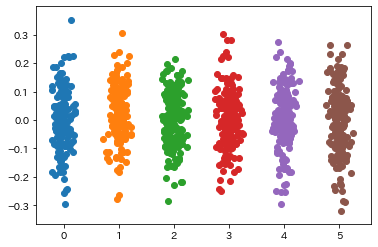

In [6]:
for k in range(6):
    plt.scatter(try_result[k][:, 0], try_result[k][:, 1])

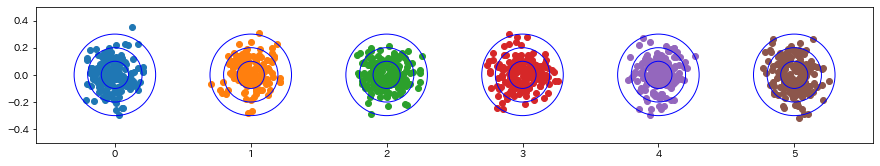

In [7]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
for l in range(6):
    circle_small = patches.Circle(xy = (l, 0), radius=0.1, color='blue', fill=False)
    ax.add_patch(circle_small)
    circle_middle = patches.Circle(xy = (l, 0), radius=0.2, color='blue',fill=False)
    ax.add_patch(circle_middle)
    circle_large = patches.Circle(xy = (l, 0), radius=0.3, color='blue',fill=False)
    ax.add_patch(circle_large)
    plt.axis('scaled')
    ax.set_ylim(-0.5, 0.5)
for k in range(6):
    plt.scatter(try_result[k][:, 0], try_result[k][:, 1])

# 【問題5】関数化

In [8]:
def throw_arrows(try_times, target_counts):
    try_result = {}
    tmp_array = np.zeros([try_times, 3])
    for i in range(try_times):
        target = np.random.choice(target_counts)
        mean = [target, 0]
        cov = [[0.01, 0], [0, 0.01]]
        darts_position = np.random.multivariate_normal(mean, cov)
        labeled_darts_position = np.hstack([darts_position, target])
        tmp_array[i] = labeled_darts_position

    for j in range(target_counts):
        try_result[j] = tmp_array[tmp_array[:, 2] == j][:, :2]
    
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    for l in range(target_counts):
        circle_small = patches.Circle(xy = (l, 0), radius=0.1, color='blue', fill=False)
        ax.add_patch(circle_small)
        circle_middle = patches.Circle(xy = (l, 0), radius=0.2, color='blue',fill=False)
        ax.add_patch(circle_middle)
        circle_large = patches.Circle(xy = (l, 0), radius=0.3, color='blue',fill=False)
        ax.add_patch(circle_large)
        plt.axis('scaled')
        ax.set_ylim(-0.5, 0.5)
    for k in range(target_counts):
        plt.scatter(try_result[k][:, 0], try_result[k][:, 1])

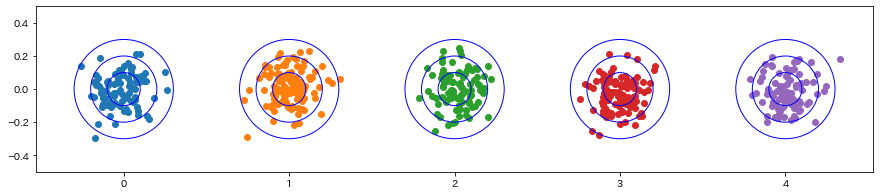

In [9]:
throw_arrows(500, 5)